In [1]:
import skrf as rf
import matplotlib.pyplot as plt
import numpy as np
import cmath as cm
import math
import sympy as sp
from sympy.solvers import solve
pi = math.pi

#Prints out numbers without "np.flat64" displaying
np.set_printoptions(legacy='1.25')

This program uses the following equation and solves for K1 and K2

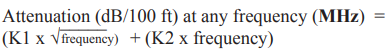

In [79]:
K1,K2,f,A = sp.symbols('K1 K2 f A')


#Based on two matrices of attenuation (db/100 ft) at a frequency (MHz), calculate
#the average K1 value, and the average K2 value.
def find_k1_k2(frequency, attenuation) :
    answers = []

    i=0
    while i<len(frequency) : #Iterate over every unique pair of frequency and attenuation.
        j=1
        while j<len(frequency)-i :
            
            # print(f'eq. 1, f={f[i]} A={A[i]}')
            # print(f'eq. 2, f={i+j} A={A[i]}')

            fx1 = K1*sp.sqrt(frequency[i]) + K2*frequency[i] - attenuation[i]
            fx2 = K1*sp.sqrt(frequency[i+j]) + K2*frequency[i+j] - attenuation[i+j]
            func = [fx1, fx2]
            ans = sp.nsolve(func, (K1, K2), (0.4,0.0001785))
            if (ans[0]>0) & (ans[1]>0) : #ignore negative values because those are non-physical
                answers.append(ans)
            j+=1
        i+=1

    k1 = []
    for a in answers :
        k1.append(a[0])
    k2 = []
    for a in answers :
        k2.append(a[1])

    return [sum(k1)/len(k1), sum(k2)/len(k2)]

LMR-195 Attenuation vs. Frequency

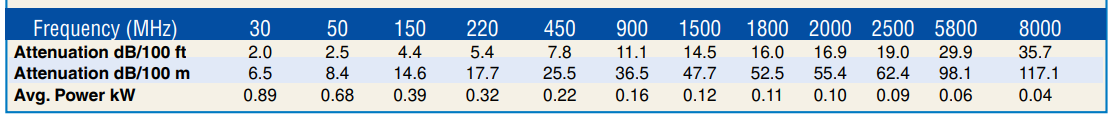

In [84]:
f=[30,50,150,220,450,900,1500,1800,2000,2500,5800,8000]
A=[2,2.5,4.4,5.4,7.8,11.1,14.5,16.0,16.9,19.0,29.9,35.7]
k1k2 = find_k1_k2(f,A)
print('=== LMR-195 K1 and K2 Values ===')
print(f'K1 = {k1k2[0]}, K2 = {k1k2[1]}')

=== LMR-195 K1 and K2 Values ===
K1 = 0.355226555282649, K2 = 0.000538718373913289
